In [9]:
%matplotlib inline

import h5py
import matplotlib.pyplot as plt
import numpy as np

In [32]:
filepath = "C:Users\\bjack\\Documents\\NGSIM Data"

In [34]:
# replace this filepath with the path where you save the data
filepath = 'C:\\Users\\bjack\\Documents\\NGSIM Data\\ngsim_feature_trajectories.h5'
f = h5py.File(filepath, 'r')

In [35]:
msg = '''
The keys correspond to the different time periods in NGSIM
each timeperiod is 15 minutes long
1,2,3 are from highway 101
4,5,6 are from highway 80
both are 5 lane highways
'''
print(msg)
print(list(f.keys()))


The keys correspond to the different time periods in NGSIM
each timeperiod is 15 minutes long
1,2,3 are from highway 101
4,5,6 are from highway 80
both are 5 lane highways

['2', '3', '5', '6', '4', '1']


In [36]:
msg = '''
The shape of each time period datasets is 
(n_vehicles, max_n_timesteps, n_features)
where
n_vehicles = number of vehicles in the dataset
max_n_timesteps = maximum length of any trajectory across all vehicles
    all the vehicles with trajectories less than that length have their
    values padded with zeros until reaching the maximum length.
n_features = the number of features for each vehicle-timestep
'''
print(msg)
print(f['1'].shape)


The shape of each time period datasets is 
(n_vehicles, max_n_timesteps, n_features)
where
n_vehicles = number of vehicles in the dataset
max_n_timesteps = maximum length of any trajectory across all vehicles
    all the vehicles with trajectories less than that length have their
    values padded with zeros until reaching the maximum length.
n_features = the number of features for each vehicle-timestep

(2150, 2286, 21)


In [5]:
msg = '''
the feature_names attribute gives the name of the various features
'''
print(msg)
print(f.attrs['feature_names'])


the feature_names attribute gives the name of the various features

['relative_offset' 'relative_heading' 'velocity' 'length' 'width'
 'lane_curvature' 'markerdist_left' 'markerdist_right' 'accel' 'jerk'
 'turn_rate_global' 'angular_rate_global' 'turn_rate_frenet'
 'angular_rate_frenet' 'timegap' 'timegap_is_avail' 'time_to_collision'
 'time_to_collision_is_avail' 'is_colliding' 'out_of_lane'
 'negative_velocity']


In [6]:
msg = '''
here's a function that extracts the length of the individual trajectories
'''
print(msg)
def compute_lengths(arr):
    sums = np.sum(np.array(arr), axis=2)
    lengths = []
    for sample in sums:
        zero_idxs = np.where(sample == 0.)[0]
        if len(zero_idxs) == 0:
            lengths.append(len(sample))
        else:
            lengths.append(zero_idxs[0])
    return np.array(lengths)

first_2_samples = f['1'][:2]
lengths_of_first_2_samples = compute_lengths(first_2_samples)
print('here are the lengths of the first 2 samples in the dataset')
print(lengths_of_first_2_samples)
lengths = compute_lengths(f['1'])


here's a function that extracts the length of the individual trajectories

here are the lengths of the first 2 samples in the dataset
[271 442]


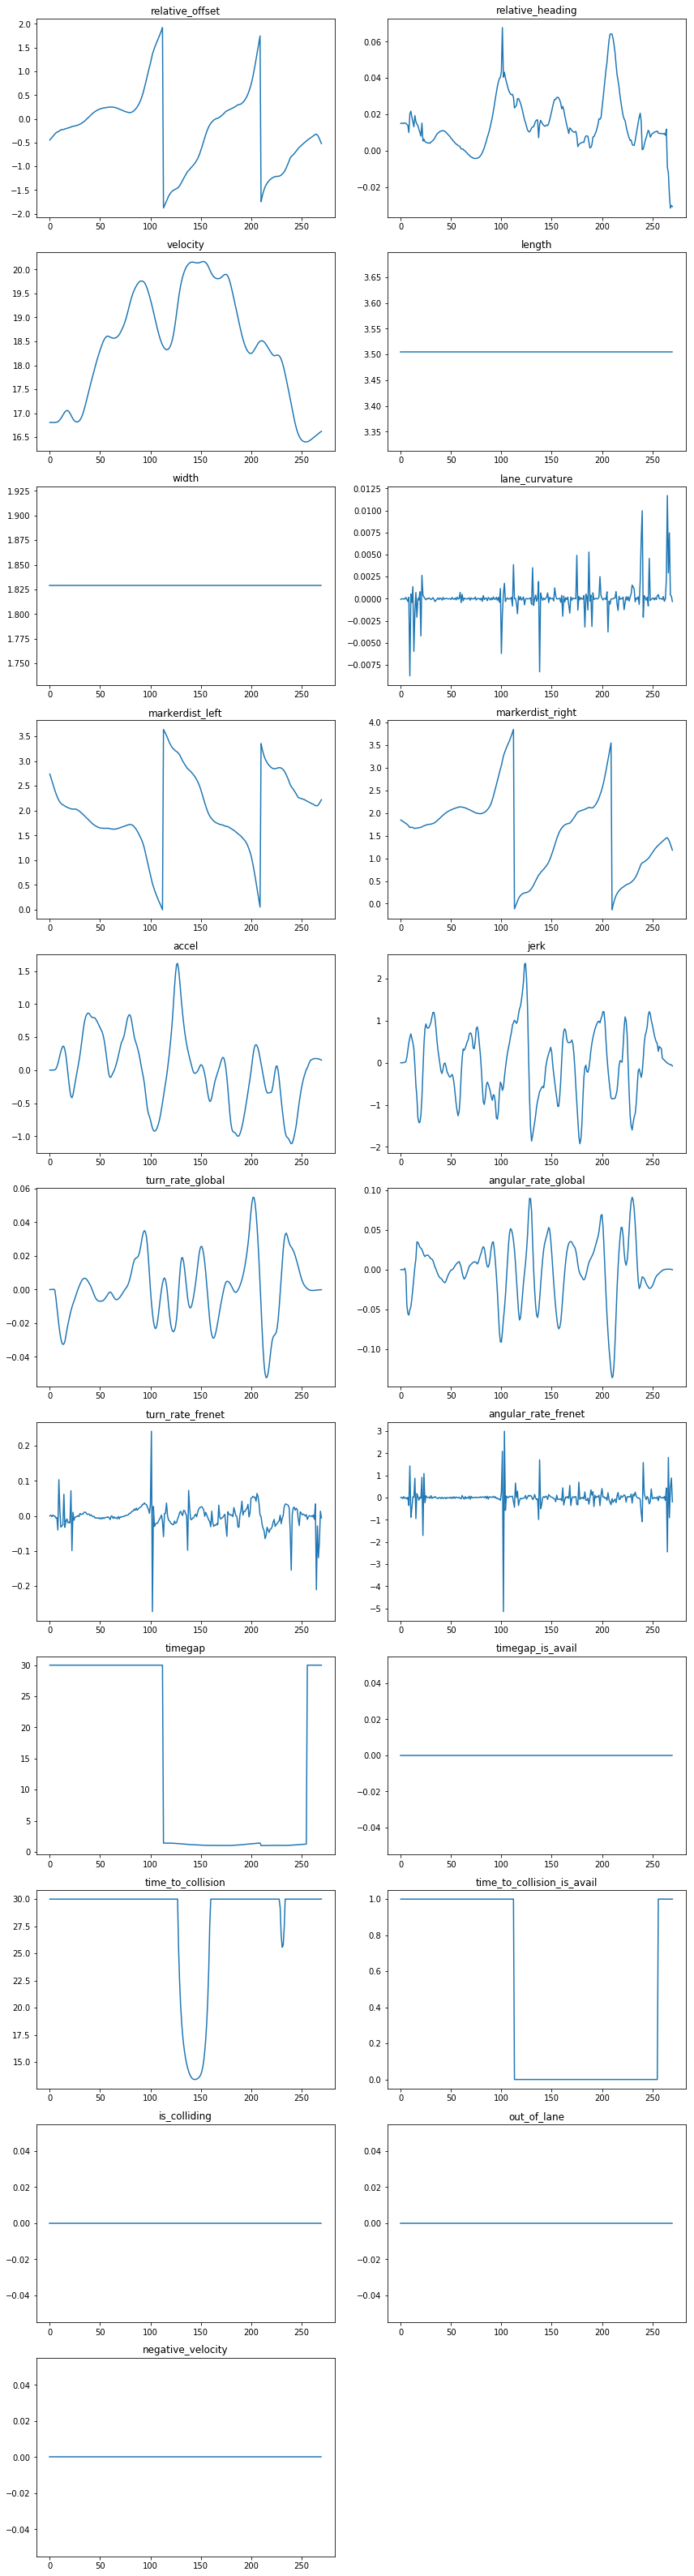

In [7]:
msg = '''
let's look at features over time for a particular vehicle
'''
nrows = 12
ncols = 2
veh_idx = 0
plt.figure(figsize=(12, nrows * 4))
for i, feature_name in enumerate(f.attrs['feature_names']):
    plt.subplot(nrows, ncols, i+1)
    plt.title(feature_name)
    plt.plot(range(lengths[veh_idx]), f['1'][veh_idx,:lengths[veh_idx],i])
plt.tight_layout()